In [75]:
import numpy as np
import pandas as pd
import nltk

from wordcloud import WordCloud
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer

import seaborn as sns

from sklearn.metrics.pairwise import cosine_similarity

from nltk.sentiment.vader import SentimentIntensityAnalyzer

from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score,f1_score,roc_curve,auc,confusion_matrix,classification_report

from selenium import webdriver

import bs4

import sumy
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.lex_rank import LexRankSummarizer

from selenium import webdriver

import gensim

import tweepy

from sklearn.cluster import KMeans

In [2]:
import os
os.getcwd()

'C:\\Users\\ASHISH\\Desktop\\TEXT MINING and SENTIMENT ANALYSIS'

# 1.	Scrape this medium article (https://towardsdatascience.com/data-science-and-machine-learning-interview-questions-3f6207cf040b) and create a word cloud to visualize frequently used words 

# (Note: Select all paragraphs and join them together as a single string and pass it to python word cloud package)


In [3]:
browser = webdriver.Chrome('chromedriver.exe') 

In [4]:
url = 'https://towardsdatascience.com/data-science-and-machine-learning-interview-questions-3f6207cf040b'
browser.get(url)

In [5]:
div_tag = browser.find_element_by_css_selector('div')
para_tags = div_tag.find_elements_by_css_selector('p')
len(para_tags)

13

In [6]:
sentences=''
for para in para_tags:
    para_text=para.get_attribute('innerHTML')
    sentences=sentences+' '+para_text
    sentences=bs4.BeautifulSoup(sentences,'html.parser').text

### BAG of Word Analysis (word cloud)

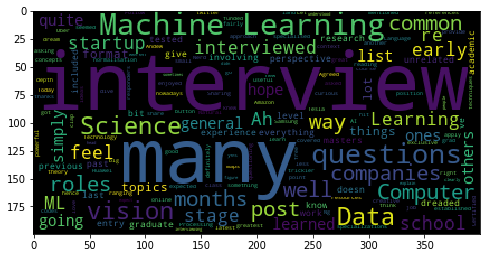

In [7]:
wc=WordCloud().generate(sentences)
plt.figure(figsize=(8,12))
plt.imshow(wc)

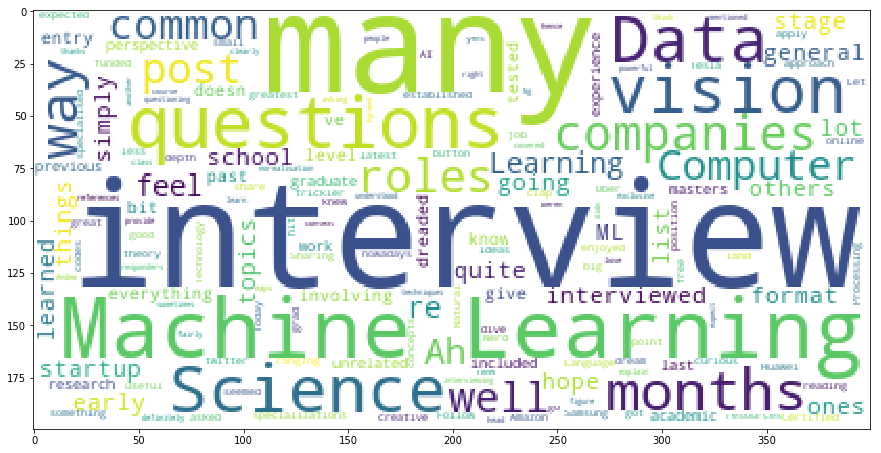

In [8]:
wc=WordCloud(background_color="White").generate(sentences)  
plt.figure(figsize=(15,15))
plt.imshow(wc)

# 2.	Using amazon reviews data set do the following
## a.	create a corpus using sklearn package. 
## b.	Create the Document Term Matrix using unigrams
## c.	Identify top 25 unigrams and filter their respective columns from DTM
## d.	Using these 25 columns, compute correlation matrix (if possible visualize the same using seaborn heatmap function). 
## e.	Using correlation matrix, Identify the pair of unigrams which has the highest correlation value


In [9]:
amazon = pd.read_csv('amazon_reviews.csv')

In [10]:
amazon.head()

,Unnamed: 0,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,0,0528881469,"[0, 0]",5.0,We got this GPS for my husband who is an (OTR)...,"06 2, 2013",AO94DHGC771SJ,amazdnu,Gotta have GPS!,1.370131e+09
1,1,0528881469,"[12, 15]",1.0,"I'm a professional OTR truck driver, and I bou...","11 25, 2010",AMO214LNFCEI4,Amazon Customer,Very Disappointed,1.290643e+09
2,2,0528881469,"[43, 45]",3.0,"Well, what can I say. I've had this unit in m...","09 9, 2010",A3N7T0DY83Y4IG,C. A. Freeman,1st impression,1.283990e+09
3,3,0528881469,"[9, 10]",2.0,"Not going to write a long review, even thought...","11 24, 2010",A1H8PY3QHMQQA0,"Dave M. Shaw ""mack dave""","Great grafics, POOR GPS",1.290557e+09
4,4,0528881469,"[0, 0]",1.0,I've had mine for a year and here's what we go...,"09 29, 2011",A24EV6RXELQZ63,Wayne Smith,"Major issues, only excuses for support",1.317254e+09


In [11]:
print(amazon.shape)

(999, 10)


In [12]:
docs = amazon['reviewText'].fillna('').str.lower().str.replace('[^a-z ]', '')  #text cleaning
docs.head(25)

0     we got this gps for my husband who is an otr o...
1     im a professional otr truck driver and i bough...
2     well what can i say  ive had this unit in my t...
3     not going to write a long review even thought ...
4     ive had mine for a year and heres what we got ...
5     i am using this with a nook hd it works as des...
6     the cable is very wobbly and sometimes disconn...
7     this adaptor is real easy to setup and use rig...
8     this adapter easily connects my nook hd  to my...
9     this product really works great but i found th...
10    this item is just as was described in the orig...
11    bought for a spare for my  nook hd and it fit ...
12    my son crewed my hd charger cord so i needed a...
13    this is a good beefy  amp charger but it cover...
14    i lost my bn original cable  i looked around f...
15    it does a and charges a dead nook in a few hou...
16    go to target or barnes and noble instead and p...
17    works well a little pricey i think for a c

In [13]:
docs_clean = []
stopwords = nltk.corpus.stopwords.words('english')
junk_words = []

stopwords.extend(junk_words)

for doc in docs:
    row_words = [word for word in doc.split(' ')if word not in stopwords]
    docs_clean.append(row_words)
    

docs_clean

[['got',
  'gps',
  'husband',
  'otr',
  'road',
  'trucker',
  '',
  'impressed',
  'shipping',
  'time',
  'arrived',
  'days',
  'earlier',
  'expected',
  '',
  'within',
  'week',
  'use',
  'however',
  'started',
  'freezing',
  'could',
  'glitch',
  'unit',
  '',
  'worked',
  'great',
  'worked',
  '',
  'work',
  'great',
  'normal',
  'person',
  'well',
  'trucker',
  'option',
  'big',
  'truck',
  'routes',
  '',
  'tells',
  'scale',
  'coming',
  'ect',
  '',
  'love',
  'bigger',
  'screen',
  'ease',
  'use',
  'ease',
  'putting',
  'addresses',
  'memory',
  '',
  'nothing',
  'really',
  'bad',
  'say',
  'unit',
  'exception',
  'freezing',
  'probably',
  'one',
  'million',
  'thats',
  'luck',
  '',
  'contacted',
  'seller',
  'within',
  'minutes',
  'email',
  'received',
  'email',
  'back',
  'instructions',
  'exchange',
  'impressed',
  'way',
  'around'],
 ['im',
  'professional',
  'otr',
  'truck',
  'driver',
  'bought',
  'tnd',
  '',
  'truck',
 

In [14]:
stop_words = nltk.corpus.stopwords.words('english')

junk_words = ['one', 'use', 'bn', 'look', 'find']

stop_words.extend(junk_words)
len(stop_words)

184

In [15]:
stemmer = nltk.PorterStemmer()
def clean_text(row_text):
    #print(type(row_text))
    row_words = row_text.split(' ')
    #print(row_words)
    row_words = [stemmer.stem(word) for word in row_words \
                 if word not in stop_words]
    #print(row_words)
    #print('-----')
    return ' '.join(row_words)

docs_clean = docs.apply(lambda v: clean_text(v))
docs_clean.head()

#def clean_text(row):
#    row_words = row.split(' ')
#    clean_words = [word for word in row_words if word not in stop_words]
#    return ' '.join(clean_words)
#docs_clean = docs.apply(clean_text)
#docs_clean.head(1)

0    got gp husband otr road trucker  impress ship ...
1    im profession otr truck driver bought tnd  tru...
2    well say  ive unit truck four day  prior garmi...
3    go write long review even thought unit deserv ...
4    ive mine year here got tri rout non truck rout...
Name: reviewText, dtype: object

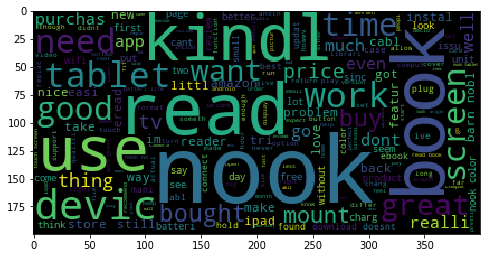

In [16]:
wc = WordCloud().generate(' '.join(docs_clean))
plt.figure(figsize=(8,12))
plt.imshow(wc)

In [17]:
len(docs_clean)

999

In [18]:
amazon.loc[200,'reviewText']

"Easy to install, with extra hardware for installing your TV. However, my TV had a curved back, so I used the included spacers to space the bars on the back of the TV. I was skeptical of the two lag bolts attaching the bracket to the stud under the drywall, so I added two 5/16&#34; lags, under washers holding the inside edges of the mounting brackets.After installing the Swing Arm wall mount, I grabbed the end of the bracket, fully extended. The bracket didn't sag a bit. I concluded that the supplied two lag bolts would have been sufficient.I've swung my TV out and exercised the various angles available, and found the swing arm not giving a millimeter.I fully recommend this wall mount. I've a few other VideoSecu mounting brackets for wall mounted and floor stand speakers and one for an 80-inch Sharp TV. All are quality products."

In [19]:
amazon.loc[230,'reviewText']

"Unfortunately, I'm returning this mount.Though I like the look of it, particularly the two part plastic piece that clips to the wall mount portion to cover the bolts, I feel that the one I ordered wasn't well made.I purchased it to mount aLG 26LE5300 26-Inch 720p 60Hz LED LCD HDTVin our kitchen.The mount arrived quickly and was well packaged. Unfortunately, the arm was welded to the wall bracket at a slight angle, meaning that regardless of how it would mount it and the LCD would never be level.Also, the powder coating near one of the bolts had come off and I could see some rust already forming.I decided to see if the mount would be the right fit for the tv before returning, figuring I would just get a replacement and hope for the best. I'm glad I did because this led me to find two other issues.The first one I blame on the manufacturers, the second I would consider a design flaw of the LG lcd.The first issue is that the screws supplied to attach the bracket to the tv are too few and 

In [20]:
cv = CountVectorizer()
sparse_matrix = cv.fit_transform(docs_clean)
numpy_matrix = sparse_matrix.toarray()
dtm = pd.DataFrame(numpy_matrix, columns=cv.get_feature_names())

In [21]:
dtm.shape

(999, 7172)

In [22]:
(((dtm == 0).sum()).sum()) / (dtm.shape[0]*dtm.shape[1])

0.9927434405962013

values in document term matrix is zero i.e 99.4% and it is a sparse matrix.

In [23]:
dtm.sum().sort_values(ascending = False)

nook             1517
book              914
read              737
work              608
kindl             585
like              507
screen            499
get               480
use               435
great             423
tablet            421
tv                416
mount             400
devic             381
would             378
want              338
good              334
time              322
also              317
need              309
buy               308
app               306
well              306
price             294
card              283
bought            276
color             273
much              272
dont              270
purchas           265
                 ... 
romanmi             1
rootabl             1
ifth                1
ifixit              1
rootableread        1
rootbett            1
idevic              1
rootedmi            1
rotatablethi        1
rotatedand          1
roughli             1
roundintegr         1
iconupdatefix       1
iconia              1
routery   

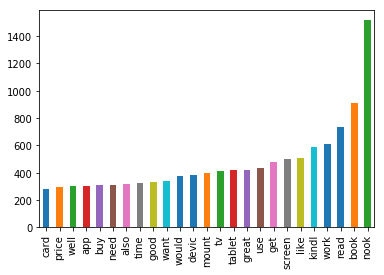

In [24]:
dtm.sum().sort_values(ascending=False).head(25)[::-1].plot.bar()

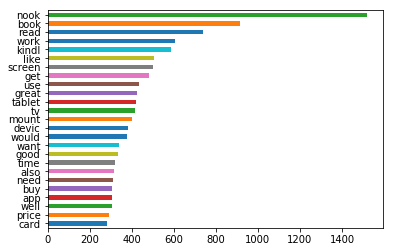

In [25]:
dtm.sum().sort_values(ascending=False).head(25)[::-1].plot.barh() #horizontal

In [26]:
dtm.sum(axis=1).sort_values(ascending=False).head()

387    1034
273     951
563     731
552     693
248     673
dtype: int64

In [27]:
amazon.loc[300]['reviewText'][:50]

'The Nook tablet is a great color e-reader with the'

In [28]:
amazon.loc[300]['reviewText'][:100]

'The Nook tablet is a great color e-reader with the "bonus" of being able to read your email, shop on'

In [29]:
amazon.loc[10]['reviewText'][:50]

'This item is just as was described in the original'

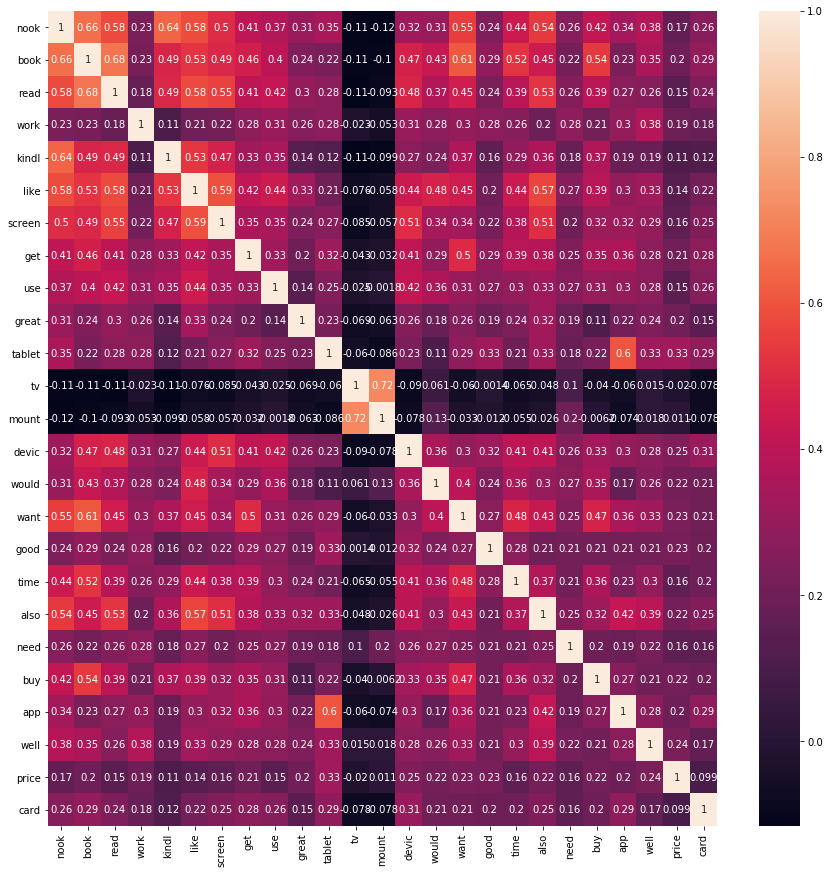

In [30]:
frequent_words = dtm.sum().sort_values(ascending=False).head(25).index
words_correlation = dtm[frequent_words].corr()
plt.figure(figsize=(15,15))
sns.heatmap(words_correlation,annot = True)

## Semantic Analysis

In [31]:
cos_sim = cosine_similarity([dtm['book'], dtm['read']])
cos_sim

array([[1.        , 0.71113393],
       [0.71113393, 1.        ]])

In [32]:
cos_sim = cosine_similarity([dtm['nook'], dtm['good']])
cos_sim

array([[1.       , 0.3552181],
       [0.3552181, 1.       ]])

### 0 to 0.4 cosine similarity is considered as WEAK
### 0.4 to 0.6 cosine similarity is considered as GOOD

In [33]:
cos_sim = pd.DataFrame(cosine_similarity(dtm.T),   #converting list to dataframe correlation
                       index=dtm.columns,
                       columns=dtm.columns)

In [34]:
cos_sim.head(10)

,aaa,aac,abandon,abil,abl,abnorm,aboutdo,aboutif,absenc,absent,...,zbox,zero,zillion,zip,zipper,zippi,zippier,zirco,zoom,zune
aaa,1.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
aac,0.0,1.000000,0.0,0.100504,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
abandon,0.0,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
abil,0.0,0.100504,0.0,1.000000,0.203240,0.100504,0.000000,0.0,0.0,0.201008,...,0.0,0.000000,0.000000,0.116052,0.0,0.000000,0.201008,0.0,0.252714,0.071067
abl,0.0,0.000000,0.0,0.203240,1.000000,0.065233,0.195698,0.0,0.0,0.065233,...,0.0,0.106525,0.065233,0.037662,0.0,0.130466,0.260931,0.0,0.257755,0.000000
abnorm,0.0,0.000000,0.0,0.100504,0.065233,1.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
aboutdo,0.0,0.000000,0.0,0.000000,0.195698,0.000000,1.000000,0.0,0.0,0.000000,...,0.0,0.408248,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
aboutif,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
absenc,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
absent,0.0,0.000000,0.0,0.201008,0.065233,0.000000,0.000000,0.0,0.0,1.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.359211,0.000000


In [35]:
def get_similar_words(word, cos_sim):
    cos_sim_word = cos_sim[word].sort_values(
        ascending=False).drop(word).head(5).index
    return list(cos_sim_word)

get_similar_words('read', cos_sim)

['book', 'nook', 'like', 'screen', 'dont']

## Unigrams

In [36]:
cv = CountVectorizer(ngram_range=(1,1))
sparse_matrix = cv.fit_transform(docs_clean)
numpy_matrix = sparse_matrix.toarray()
dtm = pd.DataFrame(numpy_matrix, columns=cv.get_feature_names())
dtm.shape

(999, 7172)

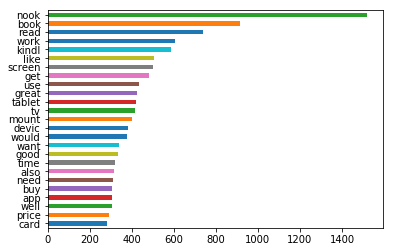

In [37]:
dtm.sum().sort_values(ascending=False).head(25)[::-1].plot.barh()

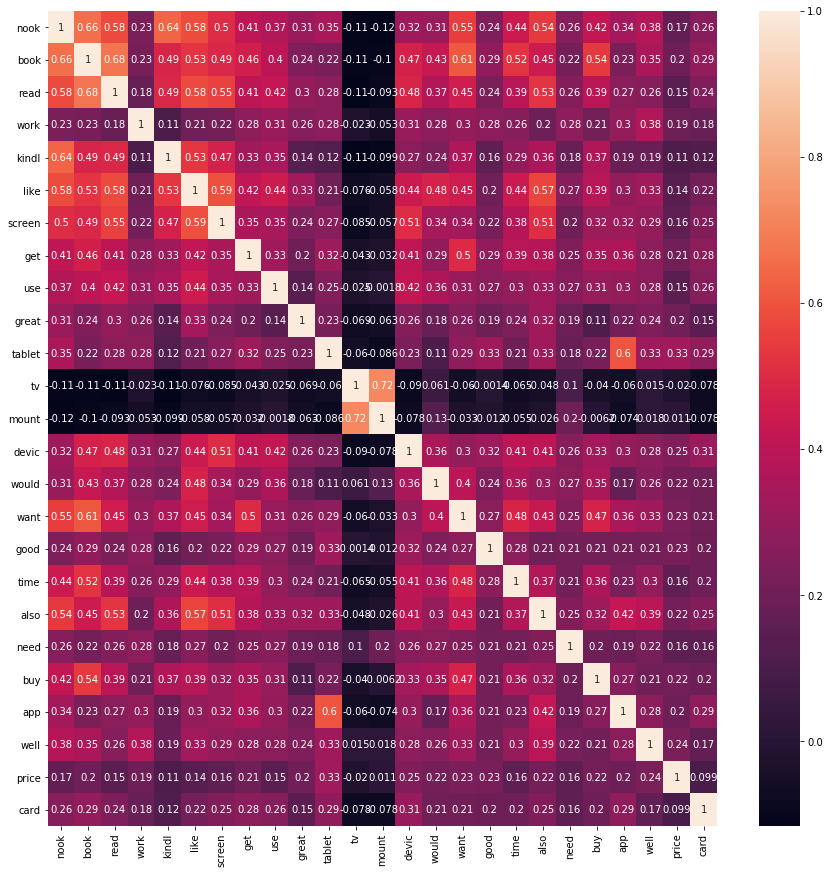

In [38]:
frequent_words = dtm.sum().sort_values(ascending=False).head(25).index
words_correlation = dtm[frequent_words].corr()
plt.figure(figsize=(15,15))
sns.heatmap(words_correlation, annot = True)

# 3.	Using the above Document Term Matrix
## a.	Use K-means clustering to cluster the reviews in to four groups
## b.	Plot a bar chart to display no. of documents under each group
## c.	Create Word cloud for each group


In [74]:
dtm.head()

,aaa,aac,abandon,abil,abl,abnorm,aboutdo,aboutif,absenc,absent,...,zbox,zero,zillion,zip,zipper,zippi,zippier,zirco,zoom,zune
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


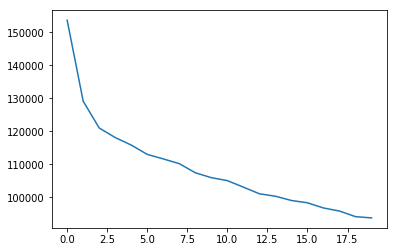

In [77]:
ssd = []
for num_clusters in list(range(1,21)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(dtm)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)

In [79]:
model_cl = KMeans(n_clusters = 4, max_iter=50)
model_cl.fit(dtm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [80]:
dtm['Review_Groups']=model_cl.labels_

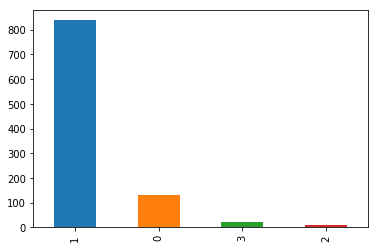

In [81]:
dtm['Review_Groups'].value_counts().plot(kind='bar')

In [94]:
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        max_words=150,
        max_font_size=30, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

In [95]:
dtm_0=dtm[dtm['Review_Groups']==0]
print(dtm_0.shape)
dtm_1=dtm[dtm['Review_Groups']==1]
print(dtm_1.shape)
dtm_2=dtm[dtm['Review_Groups']==2]
print(dtm_2.shape)
dtm_3=dtm[dtm['Review_Groups']==3]
print(dtm_3.shape)


(131, 7173)
(838, 7173)
(8, 7173)
(22, 7173)


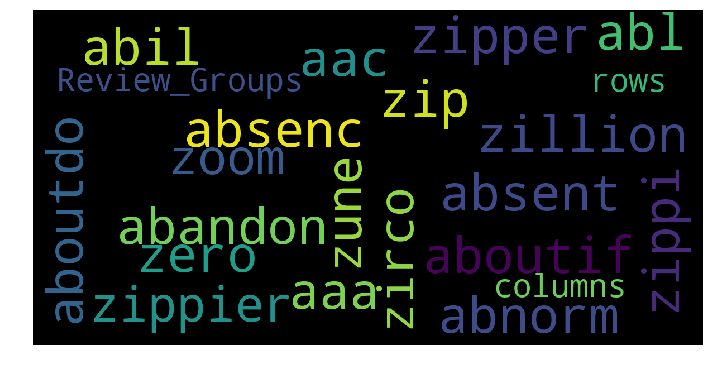

In [96]:
show_wordcloud(dtm_1)

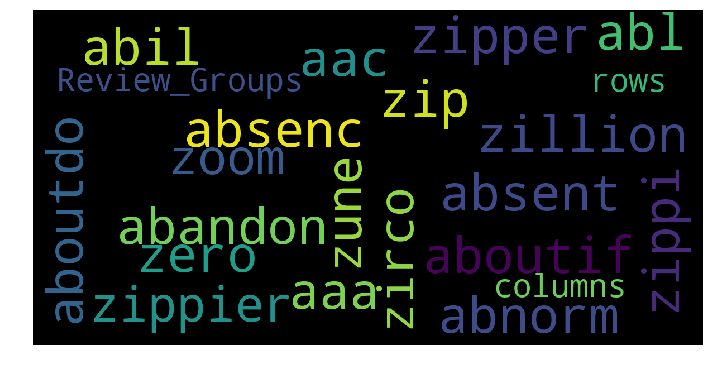

In [97]:
show_wordcloud(dtm_0)

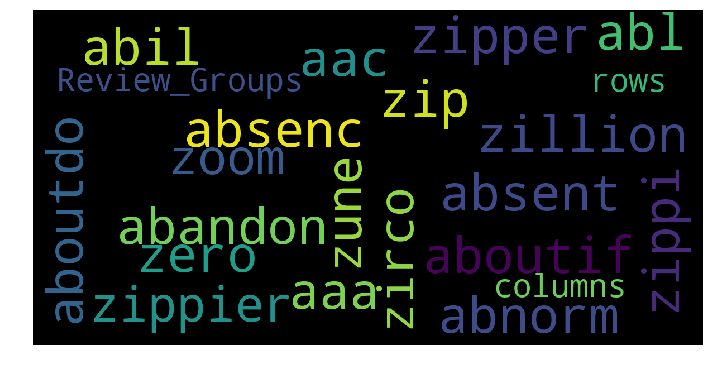

In [98]:
show_wordcloud(dtm_2)

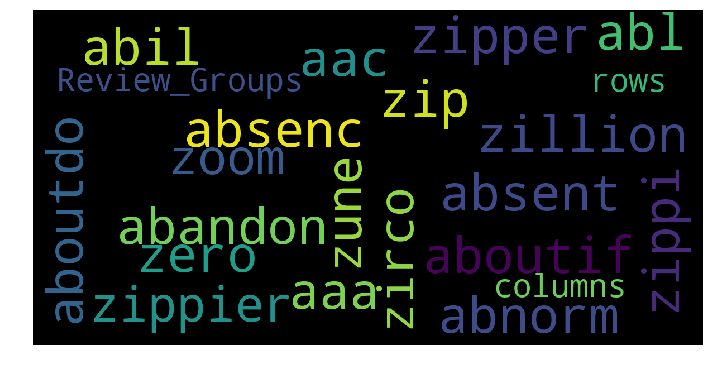

In [99]:
show_wordcloud(dtm_3)

# 4.	Using imdb movies reviews data set (imdb_sentiment.csv: https://bit.ly/2S2yXEd), create a supervised model to predict the sentiment of user reviews.
## a.	Create a word cloud using the user reviews
## b.	Use random_state=100 while splitting data in to training (80%) and testing(20%).
## c.	Comment if the target variable contains balanced or imbalanced classes (In target variable: 0 = negative, 1 = positive sentiment)
## d.	Build various supervised classification models using the training data set
## e.	Predict and compute accuracy of the model on test data set
## f.	Identify which model is best for sentiment prediction


In [39]:
data = pd.read_csv('imdb_sentiment.csv')

In [40]:
data.head()

,review,sentiment
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [41]:
data.dtypes

review       object
sentiment     int64
dtype: object

In [42]:
data.shape

(748, 2)

In [43]:
data['sentiment'].value_counts()

1    386
0    362
Name: sentiment, dtype: int64

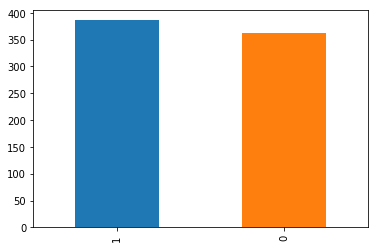

In [44]:
data['sentiment'].value_counts().plot.bar()

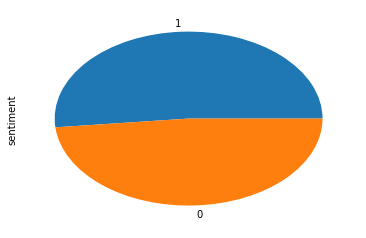

In [45]:
data['sentiment'].value_counts().plot.pie()

In [46]:
data['sentiment'].value_counts()/data.shape[0]*100

1    51.604278
0    48.395722
Name: sentiment, dtype: float64

In [47]:
import nltk
import wordcloud
import matplotlib.pyplot as plt

In [48]:
class_0 = data[data['sentiment'] == 0]
class_1 = data[data['sentiment'] == 1]

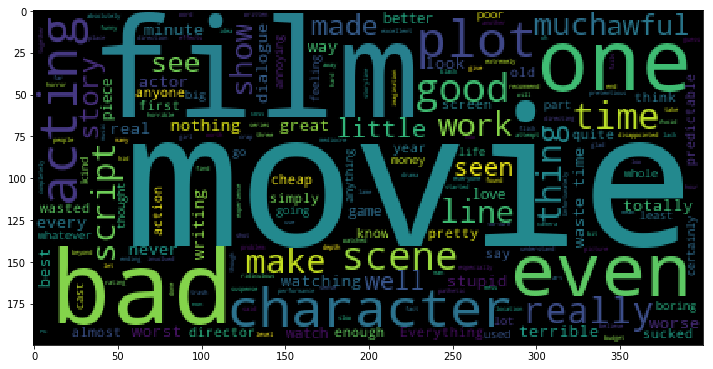

In [49]:
wc = wordcloud.WordCloud().generate(' '.join(class_0['review']))
plt.figure(figsize=(12,12))
plt.imshow(wc)

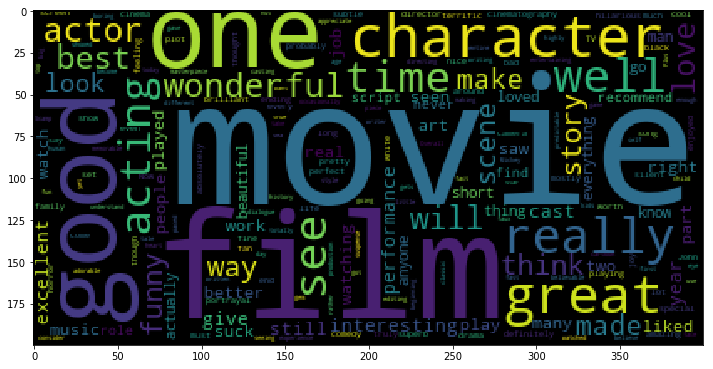

In [50]:
wc = wordcloud.WordCloud().generate(' '.join(class_1['review']))
plt.figure(figsize=(12,12))
plt.imshow(wc)

In [51]:
docs = data['review'].str.lower()
docs.head()

0    a very, very, very slow-moving, aimless movie ...
1    not sure who was more lost - the flat characte...
2    attempting artiness with black & white and cle...
3         very little music or anything to speak of.  
4    the best scene in the movie was when gerardo i...
Name: review, dtype: object

In [52]:
docs.str.replace('the','-').head()  #Replace 'the' with '-'

0    a very, very, very slow-moving, aimless movie ...
1    not sure who was more lost - - flat characters...
2    attempting artiness with black & white and cle...
3         very little music or anything to speak of.  
4    - best scene in - movie was when gerardo is tr...
Name: review, dtype: object

In [53]:
docs.str.replace('rt','').head()  #Remove rt

0    a very, very, very slow-moving, aimless movie ...
1    not sure who was more lost - the flat characte...
2    attempting ainess with black & white and cleve...
3         very little music or anything to speak of.  
4    the best scene in the movie was when gerardo i...
Name: review, dtype: object

In [54]:
docs.str.replace('[a-z]','').head()   #Remove all alphabets

0                       , ,  -,     ,   .  
1                         -      ,      .  
2        &     ,    -     -            -.  
3                                       .  
4                                       .  
Name: review, dtype: object

In [55]:
docs.str.replace('[^a-z ]','').head() 

0    a very very very slowmoving aimless movie abou...
1    not sure who was more lost  the flat character...
2    attempting artiness with black  white and clev...
3          very little music or anything to speak of  
4    the best scene in the movie was when gerardo i...
Name: review, dtype: object

In [56]:
nltk.corpus.stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [57]:
stop_words = nltk.corpus.stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [58]:
len(stop_words)

179

In [59]:
stemmer = nltk.PorterStemmer()

In [60]:
def clean_text(row_text):
    #print(type(row_text))
    row_words = row_text.split(' ')
    #print(row_words)
    row_words = [stemmer.stem(word) for word in row_words if word not in stop_words]
    #print(row_words)
    #print('-----')
    return ' '.join(row_words)
    
docs_clean = docs.apply(lambda v: clean_text(v))
docs_clean.head()

0    very, very, slow-moving, aimless movi distress...
1    sure lost - flat charact audience, nearli half...
2    attempt arti black & white clever camera angle...
3                        littl music anyth speak of.  
4    best scene movi gerardo tri find song keep run...
Name: review, dtype: object

([], <a list of 0 Text yticklabel objects>)

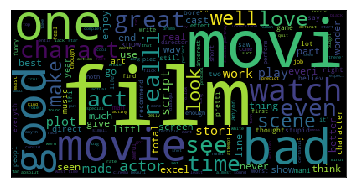

In [61]:
wc = WordCloud().generate(' '.join(docs_clean))  #Word count of cleaned data(docs_clean)
plt.imshow(wc)
plt.xticks([])
plt.yticks([])

In [62]:
train,test = train_test_split(docs_clean,test_size = 0.2,random_state = 100)
train_y = data.loc[train.index]['sentiment']
test_y = data.loc[test.index]['sentiment']

#train_y = train['setiment']
#test_y = test['sentiment']

In [63]:
cv = CountVectorizer()
cv.fit(train) 
train_x_sparse = cv.transform(train)
test_x_sparse = cv.transform(test)

In [64]:
train_x_sparse

<598x2372 sparse matrix of type '<class 'numpy.int64'>'
	with 5652 stored elements in Compressed Sparse Row format>

In [65]:
test_x_sparse

<150x2372 sparse matrix of type '<class 'numpy.int64'>'
	with 1089 stored elements in Compressed Sparse Row format>

In [66]:
dt_model = DecisionTreeClassifier(max_depth = 20,random_state = 100)
dt_model.fit(train_x_sparse,train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=20,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [69]:
pred_class= dt_model.predict(test_x_sparse)

In [70]:
pred_prob = pd.DataFrame(dt_model.predict_proba(test_x_sparse),columns = ['Positive','Negative'])

In [71]:
print(accuracy_score(test_y,pred_class))  #accuracy
print(f1_score(test_y,pred_class))

0.64
0.7032967032967032


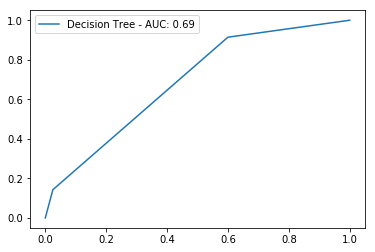

In [72]:
fpr,tpr,thresholds = roc_curve(test_y,pred_prob['Negative'])
auc_dt = auc(fpr,tpr)
plt.plot(fpr,tpr)
plt.legend(['Decision Tree - AUC: %.2f'%auc_dt])

# 6.	Apply topic modelling to cluster news based on their headlines. Using abcnews.csv (https://github.com/skathirmani/datasets/raw/master/abcnews.csv.zip file, randomly select 10,000 rows. Using multiple iterations, choose appropriate number of topics. Visualize number of documents under each cluster using a bar chart

In [100]:
data = pd.read_csv("abcnews.csv")
data.head()

,publish_date,headline_text
0,20030219,aba decides against community broadcasting lic...
1,20030219,act fire witnesses must be aware of defamation
2,20030219,a g calls for infrastructure protection summit
3,20030219,air nz staff in aust strike for pay rise
4,20030219,air nz strike to affect australian travellers


In [101]:
print(data.shape)

(1103665, 2)


In [102]:
docs = data['headline_text'].fillna('').str.lower().str.replace('[^a-z ]','')
docs.head()

0    aba decides against community broadcasting lic...
1       act fire witnesses must be aware of defamation
2       a g calls for infrastructure protection summit
3             air nz staff in aust strike for pay rise
4        air nz strike to affect australian travellers
Name: headline_text, dtype: object

In [103]:
docs_clean = []
stop_words = nltk.corpus.stopwords.words('english')
junk_words = ['','great', 'one', 'would', 'get', 'good', 'use', 'like', 'works']

stop_words.extend(junk_words)

for doc in docs:
    row_words = [word for word in doc.split(' ') if word not in stop_words]
    docs_clean.append(row_words)

print(len(docs_clean))

1103665


In [104]:
dictionary = gensim.corpora.Dictionary(docs_clean)

In [105]:
print(dictionary)

Dictionary(91600 unique tokens: ['aba', 'broadcasting', 'community', 'decides', 'licence']...)


In [106]:
docs_bow = [dictionary.doc2bow(doc) for doc in docs_clean]

In [ ]:
ldamodel = gensim.models.LdaModel(docs_bow, id2word = dictionary, num_topics =10)

In [ ]:
ldamodel

In [ ]:
topics = []

for doc_bow in docs_bow:
    topic = pd.DataFrame(ldamodel.get_document_topics(doc_bow),
             columns = ['topic','prob']).sort_values('prob').tail(1)['topic'].values[0]
    topics.append(topic)
topics[:5]

In [ ]:
data['topic_number'] = topics
data['topic'] = data['topic_number'].replace({0: "first", 1 : "indigenous",
                                                 2 : "day", 3 : "trump",
                                                 4 : "australian", 5 : "queensland",
                                                 6 : "election",7 : "family",
                                                 8 : "police", 9 : "government"})

In [ ]:
abcnews['topic'].value_counts().plot.barh()

In [ ]:
ldamodel.get_topic_terms(0)

In [ ]:
df_topic2word = pd.DataFrame()
for topic_number in range(10):
    df = pd.DataFrame(ldamodel.get_topic_terms(topic_number), columns = ['wordid', 'prob'])
    df['word'] = df['wordid'].apply(lambda v: dictionary[v])
    df['topic'] = topic_number
    df_topic2word = df_topic2word.append(df, ignore_index = True)

In [ ]:
df_topic2word.index = df_topic2word['word']
fig,axs = plt.subplots(2,2)
df_topic2word[df_topic2word['topic']==0][['word', 'prob']][::-1].plot.barh(ax = axs[0,0], figsize = (12,12))
df_topic2word[df_topic2word['topic']==1][['word', 'prob']][::-1].plot.barh(ax = axs[0,1])
df_topic2word[df_topic2word['topic']==2][['word', 'prob']][::-1].plot.barh(ax = axs[1,0])
df_topic2word[df_topic2word['topic']==3][['word', 'prob']][::-1].plot.barh(ax = axs[1,1])

In [ ]:
df_topic2word

the 6th question runing very slow .So, i am wrote the code becausae data takes too  long time to run